In [1]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# 'shift-jis' エンコーディングを指定してファイルを読み込む
df=pd.read_csv(".\datafiles\cinema.csv")
df.head(3)

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


In [3]:
#欠損値の確認
df.isnull().any(axis=0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [4]:
#欠損値の穴埋め
df2 = df.fillna(df.mean())
df2.isnull().any(axis=0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

<Axes: xlabel='SNS2', ylabel='sales'>

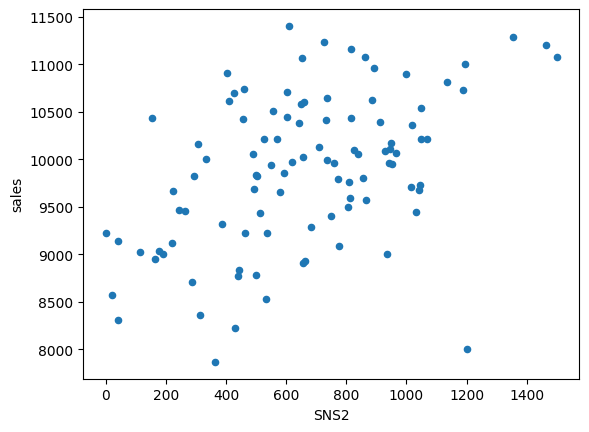

In [5]:
#SNS2列とsales列の散布図を作成
%matplotlib inline
df2.plot(kind="scatter", x = "SNS2", y = "sales")

<Axes: xlabel='original', ylabel='sales'>

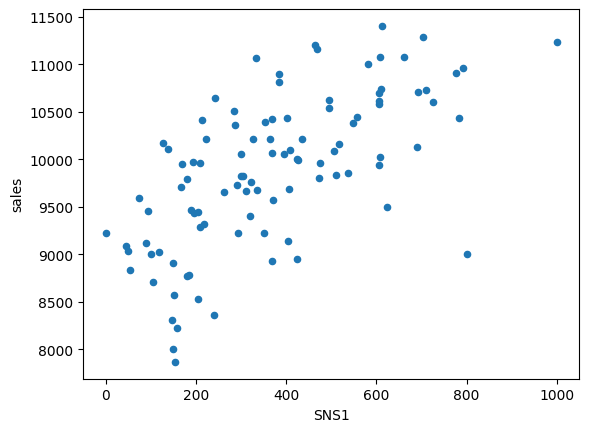

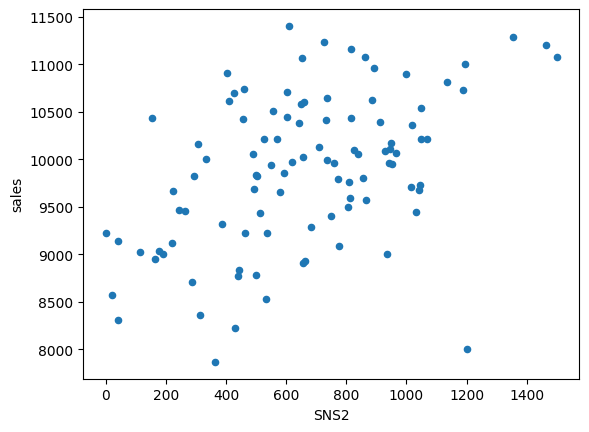

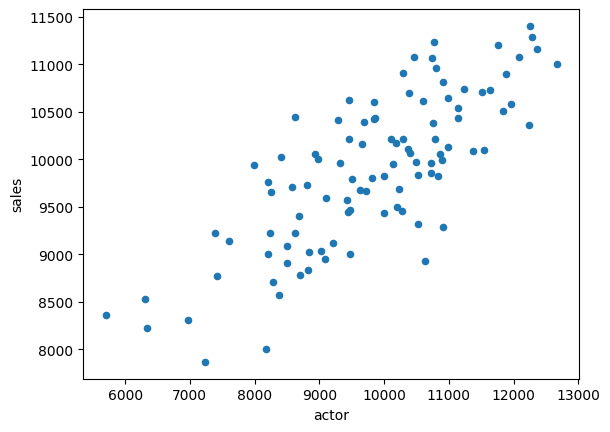

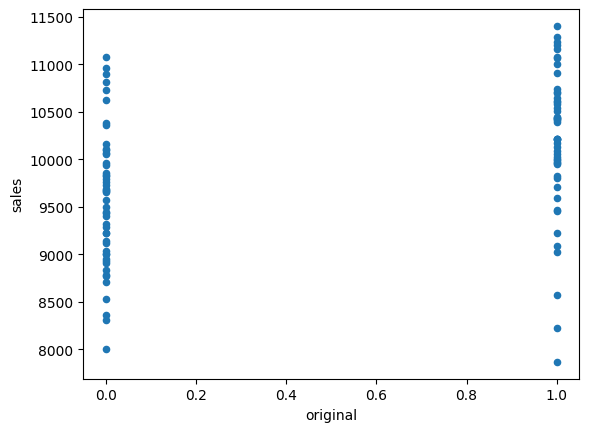

In [6]:
#特徴量との組み合わせを変えて散布図を作成
df2.plot(kind ="scatter", x ="SNS1", y = "sales")
df2.plot(kind ="scatter", x ="SNS2", y = "sales")
df2.plot(kind ="scatter", x ="actor", y = "sales")
df2.plot(kind ="scatter", x ="original", y = "sales")

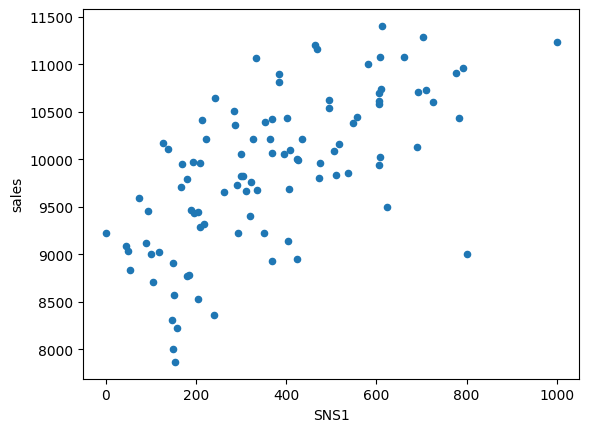

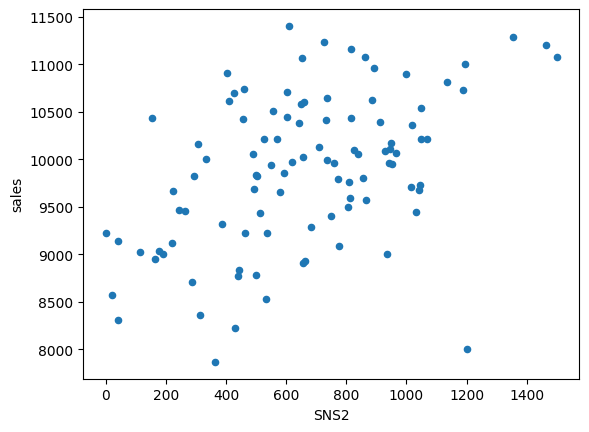

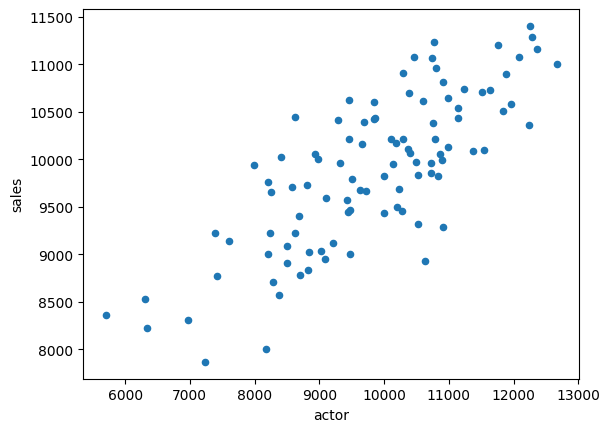

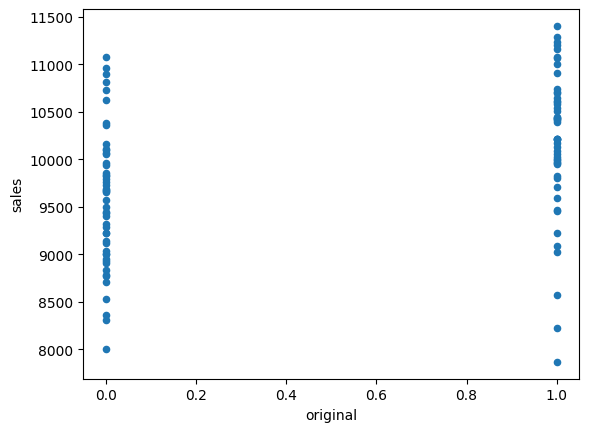

In [7]:
#コード6-5と同じことをfor分との組み合わせで行う
for name in df.columns:
    if name == "cinema_id" or name == "sales":
        continue
    df.plot(kind="scatter",x = name ,y = "sales")

In [8]:
#外れ値を削除する
no = df2[(df2['SNS2']>1000) & (df2["sales"]<8500)].index
df3 = df2.drop(no,axis=0)

In [9]:
#データフレームを作成して特定の行を参照する
test = pd.DataFrame({"Acolumn": [1, 2, 3], "Bcolumn": [4, 5, 6]})

In [10]:
#Acolumn列の値が2未満の行だけを参照する
test[test['Acolumn']<2]

,Acolumn,Bcolumn
0,1,4


In [11]:
#Acolumn列（シリーズ型）に対して比較演算を行う
test["Acolumn"]<2

0     True
1    False
2    False
Name: Acolumn, dtype: bool

In [12]:
#2つの条件で外れ値の行を特定する
df[(df['SNS2'] > 1000) & (df['sales'] < 8500)]

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [13]:
#特定した行からインデックスのみを取り出す
no = df2[(df['SNS2']>1000) & (df['sales'] < 8500)].index
no

Index([30], dtype='int64')

In [14]:
#dropメソッドでインデックスが0の行を削除する
test.drop(0,axis=0)

,Acolumn,Bcolumn
1,2,5
2,3,6


In [15]:
#列を削除する
test.drop('Bcolumn' , axis=1)

,Acolumn
0,1
1,2
2,3


In [16]:
#dropメソッドを使って外れ値を削除
df3 = df2.drop(no,axis=0)
df3.shape

(99, 6)

In [17]:
#特徴量の列の候補
col = ['SNS1','SNS2','actor','original']
x = df3[col] #特徴量の取り出し

t = df3['sales']

In [18]:
#インデックスが2、列がSNS1のマスの値のみ参照
df3.loc[2,'SNS1']

158.0

In [19]:
#特定のデータのみを参照する
index = [2,4,6]         #インデックス
col = ['SNS1','actor']  #列名

df3.loc[index,col]

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


In [20]:
#スライス構文で連続した要素を参照する
sample = [10,20,30,40]  #リストの作成
sample[1:3] #添え字が1以上3未満の要素を取得

[20, 30]

In [21]:
#0行目以上2行目以下、actor列より左の列（actor列含め）
df3.loc[0:3,:'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


In [22]:
#スライス構文で特徴量と正解データを取り出す
x = df3.loc[:,'SNS1':'original']    #特徴量の取り出し
t = df3['sales']    #正解ラベルの取り出し

In [23]:
#訓練データとテストデータに分類する
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.2,random_state=0)

In [24]:
#重回帰モデルのLinearRegression関数をインポートする
from sklearn.linear_model import LinearRegression

In [25]:
#LinearRegression関数を使ってモデルを作成する
model = LinearRegression()

In [26]:
#fitメソッドでモデルに学習させる
model.fit(x_train,y_train)

LinearRegression()

In [27]:
#興行収入を予測する
new = [[150,700,300,0]]
model.predict(new)

C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6874.109753])

In [28]:
#scoreメソッドでモデルのscoreを計算
model.score(x_test,y_test)

0.790388159657009

In [29]:
#MAEを求める
#関数のインポート
from sklearn.metrics import median_absolute_error

pred = model.predict(x_test)

#平均絶対誤差の計算
median_absolute_error(y_pred=pred,y_true=y_test)

211.78614953394845

In [30]:
#scoreメソッド
model.score(x_test,y_test)

0.790388159657009

In [31]:
#モデルの保存
import pickle

with open("./datafiles/cinema.pkl","wb") as f:
    pickle.dump(model,f)

In [32]:
#係数と切片を確認
print(model.coef_)
print(model.intercept_)

[  1.07645622   0.53400191   0.28473752 213.95584503]
6253.418729438708


In [33]:
#列と係数を表示する
tmp = pd.DataFrame(model.coef_)
tmp.index = x_train.columns
tmp

,0
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845
